In [69]:
# A Hadamard-sandwich Deutsch-Josza circuit setup

# Always start with imports

import qiskit as q
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram
# from matplotlib import style
# style.use('dark_background')

# MPL style
%matplotlib inline

# Declare simulators
# statevector_simulator to plot Bloch ballz
# qasm_simulator to plot distributions

statevector_simulator = q.Aer.get_backend('statevector_simulator')
qasm_sim = q.Aer.get_backend('qasm_simulator')

# A function that will be done frequently

def do_job(circuit):
    result = q.execute(circuit, backend=statevector_simulator).result()
    statevec = result.get_statevector()
    
    # This was recently changed to num_qubits, 
    # from the older used attribute "n_qubits"
    num_qubits = circuit.num_qubits
    
    circuit.measure([i for i in range(num_qubits)], [i for i in range(len(circuit.clbits))])
    
    qasm_job = q.execute(circuit, backend=qasm_sim, shots=1024).result()
    counts = qasm_job.get_counts()
    
    return statevec, counts

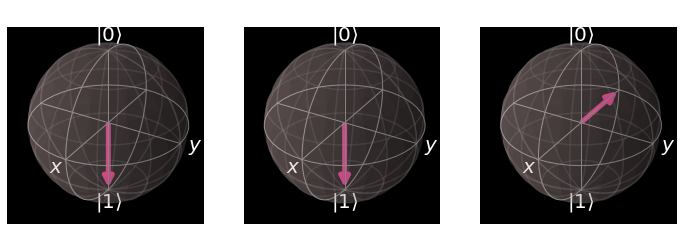

In [90]:
# Note: This starts from a fresh circuit each time
#       as opposed to building on existing

circuit = q.QuantumCircuit(3,3)

# Initialize the query qubits to |0>

circuit.initialize([1,0],0)
circuit.initialize([1,0],1)

# Initialize the bottom qubit to |1>
circuit.initialize([0,1],2)

# Create uniform superposition with a 
# Hadamard gate applied to wires 0,1,2
#
circuit.h([0,1,2])

# Add a barrier, to keep things tidy.
# Barriers have actual functional uses as well.
# Most people just use them for style.

circuit.barrier()

# An example of an oracle

circuit.cx(0,1)
circuit.cx(1,2)
circuit.cx(0,1)

# Another barrier

circuit.barrier()

# Return to computational basis states
# "Completing the Hadamard sandwich"
circuit.h([0,1])

# Another barrier, to keep the measurements to the right

circuit.barrier()

statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

# According to DJ, we should measure:
# Balanced: |1> 
# Constant: |0> 
# on every qubit execpt for the last (which remains in superposition)

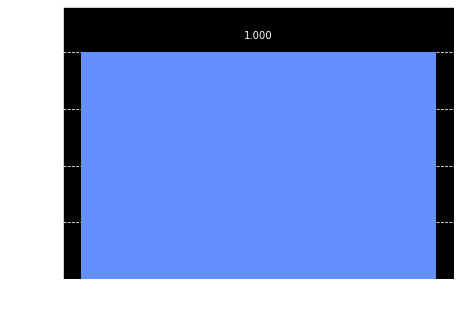

In [68]:
plot_histogram([counts])

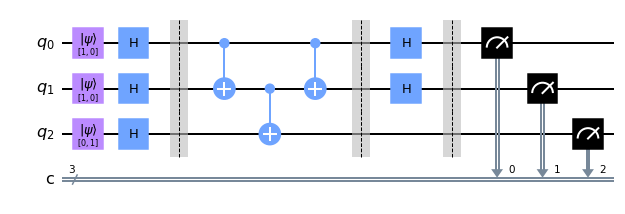

In [89]:
circuit.draw(output='mpl')